# **Projet 4 MAP Python: Stabilité des équations différentielles linéaires modulées**

Commençons par importer les bibliothèques qui seront nécessaires pour ce projet.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr
import scipy.stats as sps
import math

## **1. Équations différentielles linéaires modulées**

**S1.** Nous allons implémenter un schéma d'Euler, pour représenter la trajectoire de (4.1) en fonction du temps. Pour cela, nous devons déjà créer les constantes qui vont être utilisées pour les questions de programmation. Nous créons ainsi la constante N, qui représente le nombre de points pour établir la trajectoire, et h qui représente le l'incrément utilisé pour la méthode d'Euler. Le vecteur "matrice" permettra la création de la suite des σ(t). Enfin, on crée un vecteur x, qui contiendra, dans sa première coordonnée, le tableau des valeurs de $x_1$(t), et dans sa deuxième, celui de $x_2$(t).

In [2]:
N = 5000 
A0 = [[-1, 4], [-1, -1]]
A1 = [[-1, -1], [4, -1]]
matrice = [A0, A1]
x0 = [1, 0]
t = 20
h = t/N
p = 1/2
w1 = 1
x = [[x0[0]], [x0[1]]]
probas = [1-p, p]

Nous créons la suite des $\sigma$(t), de taille $w*t$. En effet, il y aura autant $\lfloor \omega t \rfloor$ que $\omega$t, peu importe l'incrément.

In [3]:
espace_etat = [0, 1]
echantillon1 = npr.choice(espace_etat, p=probas, size=t*w1)

Nous implémentons le schéma d'Euler, calculant le couple ($x_1 ((i+1)h)$, $x_2 ((i+1)h)$) à partir du couple à l'instant $ih$. On a ainsi: 
$$
\begin{bmatrix} 
x_1 ((i+1)h)\\
x_2 ((i+1)h) 
\end{bmatrix}
= 
\begin{bmatrix} 
x_1 (ih)\\
x_2 (ih) 
\end{bmatrix}
+ h*f(\begin{bmatrix} 
x_1 (ih)\\
x_2 (ih) 
\end{bmatrix}, ih)
$$
En particulier, la fonction f, à l'instant ih, implémentée ci-dessous, correspond à : $A_{\sigma(ih)} x(ih)$

In [4]:
def f(x, t, w, echantillon):
    x1 = x[0][-1]
    x2 = x[1][-1]
    i = math.floor(w*t)
    A = matrice[echantillon[i]]
    return np.array([x1*A[0][0] + x2*A[0][1], x1*A[1][0] + x2*A[1][1]])

À présent, traçons cette trajectoire.

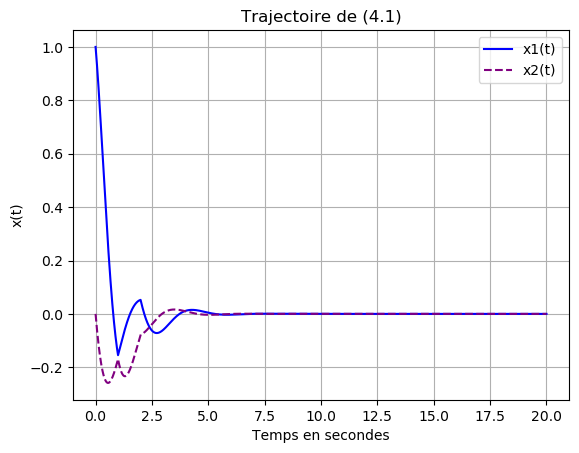

In [5]:
temps = np.linspace(0, t, N)
for i in range(1, N):
    tps = i*h
    newx1 = x[0][-1] + h*(f(x, tps, w1, echantillon1)[0])
    newx2 = x[1][-1] + h*(f(x, tps, w1, echantillon1)[1])
    x[0].append(newx1)
    x[1].append(newx2)


plt.title('Trajectoire de (4.1)')
plt.plot(temps, x[0], '-',
         label='x1(t)', color='blue')
plt.plot(temps, x[1], '--',
         label='x2(t)', color='purple')

plt.xlabel('Temps en secondes')
plt.ylabel('x(t)')
plt.legend()
plt.grid()
plt.show()

**T1.** Si les valeurs propres de $A_0$ et $A_1$ ont une partie réelle négative, alors ces matrices sont d'Hurwitz. Étudions $A_0$ dans un premier temps.
$$ A_0 = \begin{pmatrix} 
- 1 & 4\\
- 1 & - 1 
\end{pmatrix}
$$
Nous pouvons calculer le déterminant et la trace de cette matrice. De plus, en se plaçant dans les complexes, nous savons que cette matrice admet une ou deux valeurs propres, que l'on notera $\lambda_1$ et $\lambda_2$. Nous avons donc :
$$ det(A_0) = \lambda_1 \lambda_2 = 5$$
$$ Tr(A_0) = \lambda_1 + \lambda_2 = -2 $$
Les deux valeurs propres sont donc solutions de l'équation suivante : $$ x² + 2x + 5 = 0 $$
Or : $ \Delta = - 16 = (4i)² $.
Donc, nous avons : 
$$ \lambda_{1/2} = \frac{-2 \pm 4i}{2} = -1 \pm 2i$$
La partie réelle des deux valeurs propres de $A_0$ est négative, donc $A_0$ est bien une matrice d'Hurwitz.
Pour $ A_1 = \begin{pmatrix} - 1 & -1\\ 4 & - 1 \end{pmatrix}$, nous remarquons que le déterminant et la trace sont inchangés. Donc $A_1$ est aussi une matrice d'Hurwitz.

## **2. Premières observations sur la stabilité**

**T2.**
Soient $P_0$ et $P_1$ les matrices de passage respectivement de $A_0$ et $A_1$ vers leurs formes triangulaires supérieures $T_0$ et $T_1$ (qui existent toujours dans $ \mathbf{C}$). On a :
$A_0 = P_0 T_0 P_0^{-1} \quad \text{et} \quad A_1 = P_1 T_1 P_1^{-1}$
où

$T_0 = \begin{pmatrix} \lambda_{0,1} & * \\ 0 & \lambda_{0,2} \end{pmatrix} \quad \text{et} \quad T_1 = \begin{pmatrix}\lambda_{1,1} & * \\0 & \lambda_{1,2} \end{pmatrix}.$

Pour chaque $i \in \{0, 1\}$, on a :
$e^{tA_i} = P_i e^{tT_i} P_i^{-1}.$

Comme $T_i$ est triangulaire supérieure, on a :
$e^{tT_i} = \begin{pmatrix} e^{t\lambda_{i,1}} & * \\ 0 & e^{t\lambda_{i,2}} \end{pmatrix}.$

Considérons $\| e^{tA_i} x_0 \|$ pour $x_0 \in \mathbb{R}^2$. On a :

$\| e^{tA_i} x_0 \| = \| P_i e^{tT_i} P_i^{-1} x_0 \|.$

Puisque les valeurs propres de $A_i$ ont des parties réelles strictement négatives, il existe des constantes $\rho_{i,j} > 0$ telles que $| e^{t\lambda_{i,j}} | \leq e^{-\rho_{i,j} t}$. Donc,
$\| e^{tT_i} \| \leq K_i e^{-\rho_i t}$
où $K_i$ et $\rho_i$ sont des constantes positives.

En conséquence,
$\| e^{tA_i} x_0 \| \leq \| P_i \| \| e^{tT_i} \| \| P_i^{-1} \| \| x_0 \| \leq \| P_i \| K_i e^{-\rho_i t} \| P_i^{-1} \| \| x_0 \|.$

Notons $C_i = \| P_i \| K_i \| P_i^{-1} \|$. On obtient :
$\| e^{tA_i} x_0 \| \leq C_i e^{-\rho_i t} \| x_0 \|.$

Prenons $C = \max(C_0, C_1)$ et $\rho = \min(\rho_0, \rho_1)$. On a alors :
$\| e^{tA_i} x_0 \| \leq C e^{-\rho t} \| x_0 \| \quad \text{pour } i \in \{0, 1\}.$


Ainsi, il existe des constantes $C$ et $\rho$ telles que pour tout $x_0 \in \mathbb{R}^2$,
$\| e^{tA_i} x_0 \| \leq C e^{-\rho t} \| x_0 \|.$

**T3.** Nous supposons dans cette question que $A_0$ et $A_1$ commutent. Nous avons $T_t \in [0 , t]$. En effet, $T_t$ est constitué de l'ensemble des intervalles de temps sur lesquels $\sigma(t)$ vaut toujours 0. Inversement, $T_t - t$ est constitué de l'ensemble des intervalles de temps sur lesquels $\sigma(t)$ vaut toujours 1. Or, nous savons que, pour tout $t' \ge 0$, nous avons : 
$$ \omega t' - 1 < \lfloor \omega t' \rfloor \le \omega t'$$ 
Nous excluerons le dernier intervalle, s'achevant par t, et n'étant donc sans doute pas complet. Celui-ci se traite exactement de la même façon que les autres intervalles, néanmoins, pour manipuler des nombres entiers, nous ne le considérerons qu'à la fin.
Ainsi, en ignorant ce dernier intervalle incomplet, nous remarquons que nous pouvons découper $[0 , t]$ en un nombre fini d'intervalles de taille $\frac{1}{\omega}$ de la forme suivante : $[\frac{n}{\omega}, \frac{n + 1}{\omega}[$ ($n \in \mathbb{N}$). Nous avons $N =  \lfloor \omega t \rfloor$ intervalles complets de cette taille, ainsi que le dernier, incomplet. Nous posons $N = n_0 + n_1$, avec $n_0$ correspondant au nombre d'intervalles complets sur lesquels la valeurs de $\sigma(t)$ vaut toujours $0$ (et inversement pour $n_1$).

Nous avons donc : $$T_t = n_0 * \frac{1}{\omega} + \delta_0$$ 
Avec $\delta_0$ qui correspond au dernier intervalle si, sur celui-ci, $\sigma(t)$ vaut $0$, et alors $\delta_0 = t - \frac{N}{\omega}$. Si $\sigma(t)$ vaut $1$ sur le dernier intervalle, et alors $\delta_1 = t - \frac{N}{\omega}$, et nous aurons : $$t - T_t = n_1 * \frac{1}{\omega} + \delta_1$$

Résolvons (4.1) sur un des intervalles définis ci-dessus. Posons $i \in \mathbb{N}$, $i \in [0, N[$, et travaillons sur l'intervalle : $[\frac{i}{\omega}, \frac{i+1}{\omega}[$. Sur celui-ci, (4.1) devient :

$$
\left \{
\begin{array}{c @{=} c}
    x'(t) = A_{\sigma(\frac{i}{\omega})} x(t) & \forall t \in [\frac{i}{\omega}, \frac{i+1}{\omega}[ \\
    x(\frac{i}{\omega}) = x(\frac{i^{-}}{\omega}).
\end{array}
\right.
$$

La matrice j est tirée sur cet intervalle. Ainsi, la solution de l'équation différentielle est donc :
$$x(t)= x(\frac{i^{-}}{\omega})* e^{ (t-\frac{i}{\omega})A_j }$$
Et, en $t = \frac{i + 1}{\omega}$, nous avons : $$x(\frac{i + 1}{\omega})= x(\frac{i^{-}}{\omega})* e^{ \frac{A_j}{\omega} }$$

Or, les matrices commutent par hypothèse. Donc, nous pouvons réarranger les intervalles dans l'exponentielle, de manière à rassembler ceux sur lesquels la même matrice est tirée. Ainsi, en remarquant que le dernier intervalle, bien qu'incomplet, nous permet de faire la même opération, nous obtenons bien : 
$$x(t)= e^{ (n_0 * \frac{1}{\omega} + \delta_0)A_0 + (n_1 * \frac{1}{\omega} + \delta_1)A_1 } x_0 $$

C'est-à-dire : $$ x(t)= e^{ A_0 T_t-(t-T_t)A_1}(x_0)$$

Donc, en exploitant la question T2 et en séparant en un produit de matrice, nous parvenons bien à une majoration par une exponentielle décroissante, qui nous donne la convergence presque sûre vers 0 :
\begin{eqnarray*}||x(t)||&=& ||e^{T_tA_0+(t-T_t)A_1}x_0||\\&\leq& C^{2} e^{-\rho t}|| x_0||\\& \underset{t \to +\infty}{\overset{p.s}{\longrightarrow}} &0\end{eqnarray*}

**T4.** On suppose ici que $A_0 = - \lambda_0 I$ et $A_1 = - \lambda_1 I$,

On a montré que $ \forall t > 0$ , $ x(t)= e^{ - \lambda_0 T_t-(t-T_t)\lambda_1}(x_0)$ soit :

\begin{eqnarray*}
\frac{1}{t}ln(||x(t)||) & = & \frac{- \lambda_0 T_t-(t-T_t)\lambda_1}{t} + \frac{||x_0||}{t} \\&
= & (\lambda_0-\lambda_1)\frac{t-T_t}{t} -\lambda_0 + o(1)
\end{eqnarray*}

Or $  \ T_t \ $ correspond au temps passé sur $ [0,t] $ avec $ \sigma(s)=0 $ donc :

\begin{eqnarray*}
\frac{t-T_t}{t} & =& \frac{\sum_{i=1}^{\lfloor \omega t \rfloor } \frac{\bar{\sigma_k}}{\omega} }{t} + \mathbf{O}(\omega- \frac{\lfloor \omega t \rfloor }{t}) \\& = &
\frac{\sum_{i=1}^{\lfloor \omega t \rfloor } \bar{\sigma_k} }{\omega t} + \mathbf{o}(1)
\end{eqnarray*}

Les $ \bar{\sigma_k} $ étant intégrables et i.i.d, on peut appliquer la loi forte des grands nombres et :

\begin{eqnarray*}
\frac{\sum_{i=1}^{\lfloor \omega t \rfloor } \bar{\sigma_k} }{\omega t} \underset{t \to +\infty}{\overset{p.s}{\longrightarrow}} \mathbb{E}(\bar{\sigma_0})=p
\end{eqnarray*}

Soit finalement : 
\begin{eqnarray*}
\frac{1}{t}ln(||x(t)||) \underset{t \to +\infty}{\overset{p.s}{\longrightarrow}} -((1-p)\lambda_0 + p \lambda_1)
\end{eqnarray*}

**S2.** Nous reprenons le schéma d'Euler de la question S1, en modifiant w et t.

In [6]:
t2 = 5
h2 = t2/N
w2 = 100
x2 = [[x0[0]], [x0[1]]]
probas = [1-p, p]

In [7]:
espace_etat = [0, 1]
echantillon2 = npr.choice(espace_etat, p=probas, size=t2*w2)

La définition de la fonction f en question S1 nous permet de réutiliser directement la fonction, en adaptant certaines variables utilisées dans cette fonction.

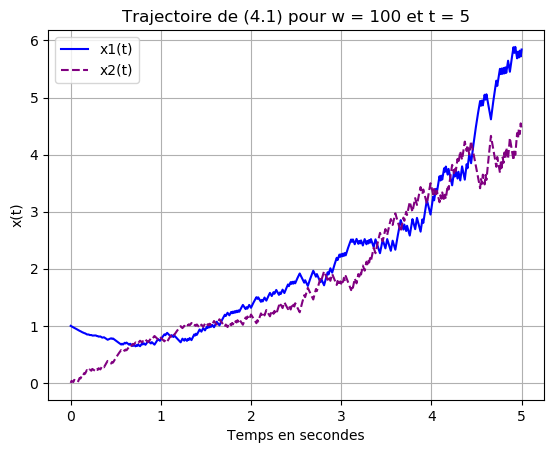

In [8]:
temps2 = np.linspace(0, t2, N)
for i in range(1, N):
    tps = i*h2
    newx1 = x2[0][-1] + h2*(f(x2, tps, w2, echantillon2)[0])
    newx2 = x2[1][-1] + h2*(f(x2, tps, w2, echantillon2)[1])
    x2[0].append(newx1)
    x2[1].append(newx2)


plt.title('Trajectoire de (4.1) pour w = 100 et t = 5')
plt.plot(temps2, x2[0], '-',
         label='x1(t)', color='blue')
plt.plot(temps2, x2[1], '--',
         label='x2(t)', color='purple')

plt.xlabel('Temps en secondes')
plt.ylabel('x(t)')
plt.legend()
plt.grid()
plt.show()

On remarque, en refaisant plusieurs fois l'expérience, que la trajectoire ne semble pas converger vers 0 avec w = 100, et t = 5. De plus, en testant différents t, on remarque que la trajectoire continue à diverger. Ainsi, on conclue sur l'importance de $\omega$ pour la convergence de la trajectoire.

## **3. Processus angulaire**

**T5.** a) Premièrement, $y$ est bien définie puisqu'une exponetielle de matrice est toujours inversible et donc si $ x_0$ est différent de 0, $y$ l'est aussi. $\\$ On sait que pour $ x \in \mathbf{R}^{2 *} \ ,\ h \in \mathbf{R}^{2} \ \ d||.||_x(h) =\frac{< x, h>}{||x||}   $, et donc par composition de différentielles on a :


\begin{eqnarray*}
y^{,}(t) &=& \frac{x^{,}(t)}{||x(t)||} - x(t) \frac{<x(t),x^{,}(t)>}{||x(t)||^{3}} \\ \\ & = & A_\sigma(t)\frac{x(t)}{||x(t)||}-\frac{x(t)^{T} A_\sigma(t) x(t)}{||x(t)||^{3} }\\ \\ & =& (A_\sigma(t)-y^{T}(t)A_\sigma(t)y(t)I_d)y(t)
\end{eqnarray*}

De plus, on peut écrire:

\begin{eqnarray*}
ln(||x(t)||)^{,} &=& \frac{x^{,}(t)}{||x(t)||^{2}} \\ \\ & =& y^{T}(t)A_\sigma(t)y(t)
\end{eqnarray*}

D'où en intégrant :
\begin{eqnarray*}
ln(||x(t)||)=ln(||x_0||) + \int_{0}^{t} y^{T}(s)A_\sigma(s)y(s) \, \mathrm{d}s 
\end{eqnarray*}

b) On peut écrire d'une part que :
\begin{eqnarray*}
<y^{,}(t), e_{\theta (t)+ \frac{\pi}{2}}> & =& \theta^{,}(t)< \begin{pmatrix} 
-sin(\theta(t)) \\
cos( \theta(t)) 
\end{pmatrix}
,
\begin{pmatrix} 
cos(\theta(t)+\frac{\pi}{2}) \\
sin( \theta(t)+\frac{\pi}{2}) 
\end{pmatrix} > \\& = & \theta^{,}(t)
\end{eqnarray*}

D'autre part en exploitant le résultat qui précéde :
\begin{eqnarray*}
<y^{,}(t), e_{\theta (t)+ \frac{\pi}{2}}> & =& <(B(t)- y^{T}B(t)y(t)I_d)y(t),e_{\theta (t)+ \frac{\pi}{2}}> \\&=&
(B_{22}-B_{11})sin(t)cos(t)+B_{21}cos^{2}(t)-B_{12}sin^{2}(t)
\end{eqnarray*}
Soit le résultat recherché :
\begin{eqnarray*}
\theta^{,}(t)=(B_{22}-B_{11})sin(t)cos(t)+B_{21}cos^{2}(t)-B_{12}sin^{2}(t)
\end{eqnarray*}



**S3.** Nous utilisons à nouveau la méthode d'Euler.

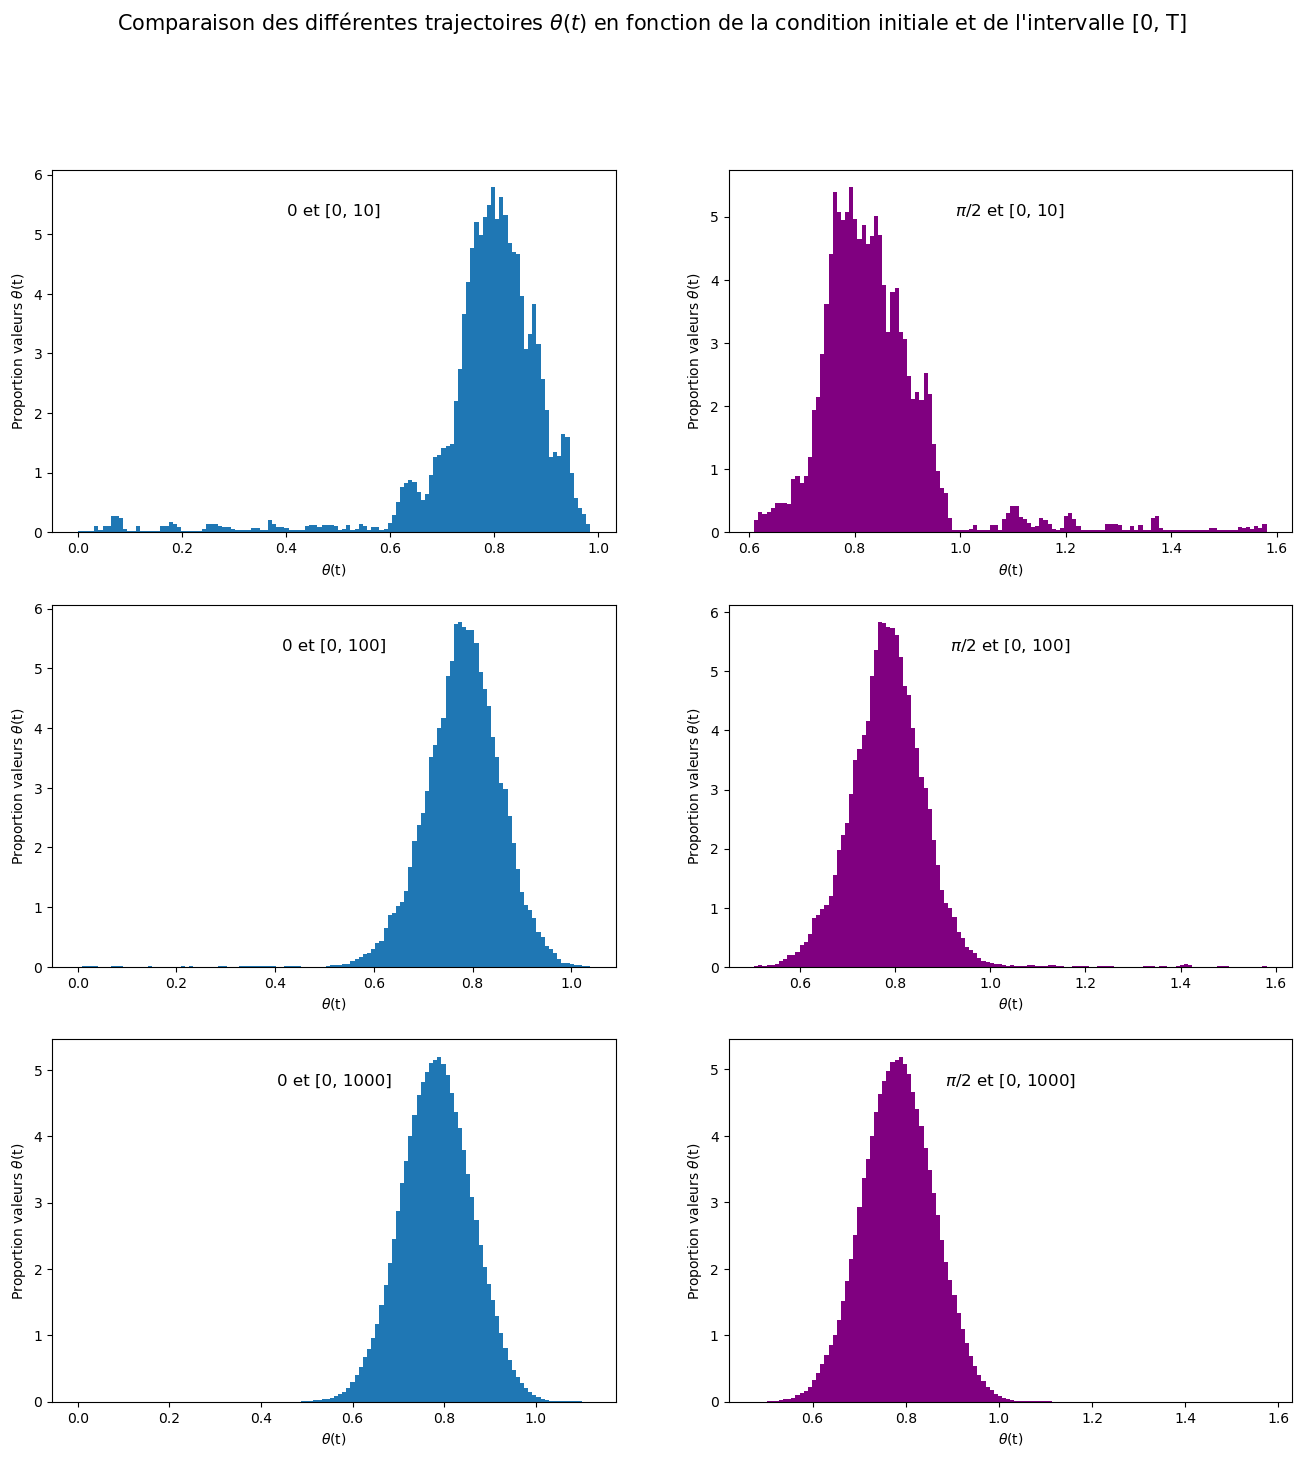

In [9]:
N2 = 250000
A0 = [[-1, 4], [-1, -1]]
A1 = [[-1, -1], [4, -1]]
matrice = [A0, A1]
theta01 = 0
theta02 = np.pi/2
T = [10, 100, 1000]

p = 1/2
probas = [1-p, p]
espace_etat = [0, 1]

wtest = 200
theta1 = [[theta01], [theta01], [theta01]]
theta2 = [[theta02], [theta02], [theta02]]


# -- Définition de la fonction:
def g(x, t, w, echantillon, i):
    x1 = x[i][-1]
    j = math.floor(w*t)
    A = matrice[echantillon[j]]
    return ((A[1][1] - A[0][0])*np.cos(x1)*np.sin(x1)
            + A[1][0]*np.cos(x1)**2 - A[0][1]*np.sin(x1)**2)


def representant(x):
    newx = x % (2*np.pi)
    if np.pi < newx <= 2*np.pi:
        newx = newx - 2*np.pi
    return newx


for i in range(len(T)):
    t = T[i]
    h3 = t/N2
    echantillon = npr.choice(espace_etat, p=probas, size=wtest*t)
    for k in range(1, N2):
        tps = k*h3
        newtheta1 = theta1[i][-1] + h3*(g(theta1, tps, wtest, echantillon, i))
        newtheta2 = theta2[i][-1] + h3*(g(theta2, tps, wtest, echantillon, i))
        newtheta1 = representant(newtheta1)
        newtheta2 = representant(newtheta2)
        theta1[i].append(newtheta1)
        theta2[i].append(newtheta2)


plt.figure(figsize=(16, 16))
plt.suptitle(f"Comparaison des différentes trajectoires $\\theta(t)$ en fonction de la condition initiale et de l'intervalle [0, T]", fontsize=15)

for i in range(len(T)):
    # Traçons le premier graphe, pour theta0 = 0
    plt.subplot(3, 2, 2*i + 1)

    plt.title(f"0 et [0, {T[i]}]", position=(0.5, 0.85))
    nb_bins = 2 * int(N2**(1./3.))
    plt.hist(theta1[i], bins=nb_bins, density=True)
    plt.xlabel(f"$\\theta$(t)")
    plt.ylabel(f"Proportion valeurs $\\theta$(t)")
    # plt.legend(loc='best')

    # Traçons le deuxième graphe, pour theta0 = np.pi/2
    plt.subplot(3, 2, 2*i + 2)

    plt.title(f"$\\pi$/2 et [0, {T[i]}]", position=(0.5, 0.85))
    nb_bins = 2 * int(N2**(1./3.))
    plt.hist(theta2[i], bins=nb_bins, density=True, color='purple')
    plt.xlabel(f"$\\theta$(t)")
    plt.ylabel(f"Proportion valeurs $\\theta$(t)")
    # plt.legend(loc='best')


plt.show()

Nous remarquons que, peu importe la condition initiale, $\theta(t)$ converge en loi vers une gaussienne, centrée autour d'un peu moins de 0.8.

## **4. Exposant de Lyapunov** 

**T6.** On suppose que $ \Lambda >0$:
\begin{eqnarray*}
\frac{1}{t} \int_{0}^{t} e_{\theta(s)}^{T}(s)A_\sigma(s)e_{\theta(s)} \, \mathrm{d}s & = &\frac{1}{t} \int_{0}^{t} y^{T}(s)A_\sigma(s)y(s) \, \mathrm{d}s \\& \underset{t \to +\infty}{\overset{p.s}{\longrightarrow}}& \Lambda
\end{eqnarray*}

En utilisant ce qui a été montré à la question T5 a) on a que :


\begin{eqnarray*}
\frac{ln(||x(t)||)}{t} \underset{t \to +\infty}{\overset{p.s}{\longrightarrow}}& \Lambda 
\end{eqnarray*}

De plus, par continuité, il vient que :
\begin{eqnarray*}
\frac{||x(t)||}{e^{\Lambda t}} \underset{t \to +\infty}{\overset{p.s}{\longrightarrow}} 1
\end{eqnarray*}

Donc $ ||x(t)|| \underset{t \to +\infty}{\overset{p.s}{\longrightarrow}} \infty $.

Si maintenant on a $ \Lambda <0$, on peut toujours écrire que:


\begin{eqnarray*}
\frac{||x(t)||}{e^{\Lambda t}} \underset{t \to +\infty}{\overset{p.s}{\longrightarrow}} 1
\end{eqnarray*}

Avec $ \Lambda <0$, donc $ ||x(t)|| \underset{t \to +\infty}{\overset{p.s}{\longrightarrow}} 0 $



**T7.** Dans le contexte de la question (T4), on a montré que $\Lambda= -((1-p)\lambda_0 + p \lambda_1)<0 $ donc:
\begin{eqnarray*}
||x(t )|| \underset{t \to +\infty}{\overset{p.s}{\longrightarrow}} 0
\end{eqnarray*}

C'est cohérent avec le résultat de la question T3.

**S4.** Comme dans toutes les questions de simulation, nous nous plaçons dans le cas (4.2), avec $p = 1/2$. Ici, on posera $\omega = 100$. Nous allons étudier la trajectoire de : 
\begin{eqnarray*}
t \mapsto \frac{1}{t} \int_{0}^{t} e_{\theta(s)}^{T}(s)A_\sigma(s)e_{\theta(s)} \, \mathrm{d}s
\end{eqnarray*}

La condition initiale pour $\theta$ est, en calculant $y(0) = \frac{x(0)}{||x(0)||}$, $\theta(0) = 0$ (nous prenons le représentant dans $]-\pi, \pi]$).

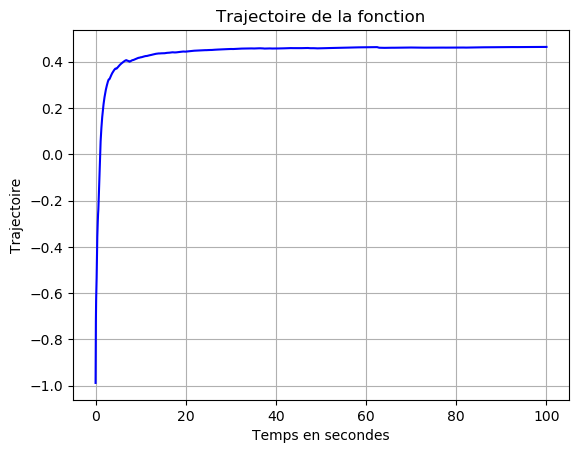

In [10]:
N4 = 50000
w6 = 100
# Nous définissons un temps maximal, tel qu'on puisse observer la convergence avant ce temps.
# Nous calculerons les valeurs de la fonction dans l'intégrale, avec la méthode la question S3, jusqu'à ce temps tmx.
tmax = 100
theta0 = 0
theta = [theta0]

# Nous réutilisons la fonction g définie dans la question S3. Nous la modifions légèrement pour prendre en compte l'absence de vecteur T.
def g2(x, t, w, echantillon):
    x1 = x[-1]
    j = math.floor(w*t)
    A = matrice[echantillon[j]]
    return ((A[1][1] - A[0][0])*np.cos(x1)*np.sin(x1)
            + A[1][0]*np.cos(x1)**2 - A[0][1]*np.sin(x1)**2)

h4 = tmax/N4
echantillon6 = npr.choice(espace_etat, p=probas, size=w6*tmax)
for k in range(1, N4):
    tps = k*h4
    newtheta = theta[-1] + h4*(g2(theta, tps, w6, echantillon6))
    newtheta = representant(newtheta)
    theta.append(newtheta)

# Nous avons à présent un tableau avec des valeurs de theta(t) sur [0, tmax]. Nous allons à présent définir la fonction calculée dans
# l'intégrale, en t, ce qui nous permettra d'utiliser les méthodes d'intégration à partir d'une série de valeurs (trapèze, notamment).
def h(t, theta, h):
    # Nous récupérons la valeur approchée de theta(t).
    k = math.floor(t/h)
    theta_t = theta[k]
    # Nous pourrions récupérer la matrice qui a été alétoirement choisie. Néanmoins, en déterminant l'expression de la fonction,
    # en multipliant les matrices entre elles, nous remarquons que nous obtenons deux simplifications : les coefficients de la diagonale
    # de A0 et A1 étant les mêmes, nous pouvons simplifier les cos² et sin² ensembles. De plus, la trace de l'anti-diagonale vaut toujours 3.
    return 3 * np.cos(theta_t) * np.sin(theta_t) -1


valeurs_h = [h(h4*i, theta, h4) for i in range(0, N4)]

#Traçons à présent la trajectoire : cela consiste à prendre une partie du tableau valeurs_h à chaque fois, pour calculer l'intégrale
# entre 0 et le temps t fixé, t < tmax, puis à diviser la valeur obtenue par t.
temps3 = [] 
# Nous définissons un intervalle de temps qui ne commencera pas à 0 car la valeur de 1/t n'y est pas définie.
valeurs_int = []
for i in range(1, N4):
    tps = i*h4
    temps3.append(tps)
    I = np.trapz(valeurs_h[0: i+1], dx=h4)
    valeurs_int.append(I/tps)


plt.title('Trajectoire de la fonction')
plt.plot(temps3, valeurs_int, '-', color='blue')
plt.xlabel('Temps en secondes')
plt.ylabel('Trajectoire')
plt.grid()
plt.show()

Nous pouvons estimer la limite $\Lambda(100)$ en calculant la valeur finale de la fonction : $t \mapsto \frac{1}{t} \int_{0}^{t} e_{\theta(s)}^{T}(s)A_\sigma(s)e_{\theta(s)} \, \mathrm{d}s $.

Nous pouvons comparer deux méthodes d'intégration, et vérifier que le résultat final est cohérent dans les deux cas.

In [11]:
# Méthode des trapèzes
I1 = np.trapz(valeurs_h, dx=h4)
print(I1/(h4 * (N4-1)))

# Méthode du point milieu
valeurs_h = np.array(valeurs_h)
I2 = h4*valeurs_h.sum()
print(I2/(h4 * (N4-1)))

0.46396649649244304
0.4639613778649586


Nous en concluons que $\Lambda(100) \approx 0.46$. En particulier, $\Lambda(100) > 0$. Donc, selon la question T6, nous devrions observer : 
\begin{eqnarray*}
||x(t )|| \underset{t \to +\infty}{\overset{p.s}{\longrightarrow}} \infty
\end{eqnarray*}
Nous remarquons qu'au vu de la question S2, ce résultat est cohérent. La norme de x diverge bien.

**S5.** Nous allons à présent répéter l'opération réalisée dans la question précédente pour différentes valeurs de $\omega$, ainsi que pour différentes valeurs de p. Nous prendrons une dizaine de valeurs de $\omega$ dans [0.1, 100] et de même, 5 valeurs de p entre 0 et 1. Pour cela, nous rangerons les valeurs obtenues dans une matrice, et nous diminuerons la valeur de N utilisée dans la question précédente, de manière à accélérer les calculs.

In [12]:
W = [0.1, 0.5, 1, 5, 10, 30, 50, 70, 90, 100] 
# On pourra décommenter la ligne suivante, et commenter celle d'après pour observer les variations en fonction de p.
# P = [0, 25/100, 5/10, 75/100, 1]
P = [0.5]
# Le tableau suivant contiendra les valeurs de la fonction dans chaque cas :
# en ligne, en fonction de la valeur de p, en colonne en fonction de w.
tab_valeurs_int = [[[] for i in range(len(W))] for j in range(len(P))]
tab_valeurs_lambda = [[0 for i in range(len(W))] for j in range(len(P))]
tmax2 = 10

# On pourra éventuellement vérifier la convergence en traçant les courbes. Dans ce cas, il faudra décommenter les lignes suivantes. 
#plt.figure(figsize=(20, 30))
#plt.suptitle("Vérification de la convergence en fonction de p et w", fontsize=15)


for i in range(len(W)):
    for j in range(len(P)):
        w = W[i]
        p = P[j]
        probas = [1-p, p]
        #N5 = max(tmax2*w*2, 2000) # Nous choisissons d'échantillonner en fonction de w, pour limiter la complexité du programme,
        # tout en préservant la justesse des résultats.
        N5 = 20000
        theta = [0]
        h5 = tmax2/N5
        echantillon = npr.choice(espace_etat, p=probas, size=math.floor(w*tmax2)+1)
        valeurs_h = []
        temps4 = [] 
        for k in range(1, N5):
            tps = k*h5
            newtheta = theta[-1] + h5*(g2(theta, tps, w, echantillon))
            newtheta = representant(newtheta)
            theta.append(newtheta)
            valeurs_h.append(h(tps, theta, h5))
            temps4.append(tps)
            I = np.trapz(valeurs_h[0: k+1], dx=h5)
            tab_valeurs_int[j][i].append(I/tps)
        I = np.trapz(valeurs_h, dx=h5)
        tab_valeurs_lambda[j][i] = I/(h5 * (N5-1))
        
        # On pourra éventuellement vérifier la convergence en traçant les courbes. Dans ce cas, il faudra décommenter les lignes suivantes. 
        #plt.subplot(len(P), len(W), len(W)*j + i + 1)
        #plt.title('Trajectoire')
        #plt.plot(temps4, tab_valeurs_int[j][i], '-', color='blue')
        #plt.xlabel('Temps en secondes')
        #plt.ylabel('Trajectoire')
        #plt.grid()
#plt.show()
print(tab_valeurs_lambda)

[[-1.0493938991914966, -0.8272766841632287, -0.7274061248282855, -0.08943893293281088, 0.25262166199778313, 0.32183300421918204, 0.36801321691188316, 0.42221405600537404, 0.43959634538310793, 0.4230153138797107]]


In [13]:
for i in range(len(W)):
    print(f"Pour w = {W[i]}, nous obtenons Lambda = {tab_valeurs_lambda[0][i]}")

Pour w = 0.1, nous obtenons Lambda = -1.0493938991914966
Pour w = 0.5, nous obtenons Lambda = -0.8272766841632287
Pour w = 1, nous obtenons Lambda = -0.7274061248282855
Pour w = 5, nous obtenons Lambda = -0.08943893293281088
Pour w = 10, nous obtenons Lambda = 0.25262166199778313
Pour w = 30, nous obtenons Lambda = 0.32183300421918204
Pour w = 50, nous obtenons Lambda = 0.36801321691188316
Pour w = 70, nous obtenons Lambda = 0.42221405600537404
Pour w = 90, nous obtenons Lambda = 0.43959634538310793
Pour w = 100, nous obtenons Lambda = 0.4230153138797107


## **5. Homogénéisation à haute fréquence**

**T8.** Nous nous intéressons à présent à des matruces de la forme suivante : $p \in ]0, 1[$ tel que $A_p = (1 - p)A_0 + pA_1$.
En particulier, nous allons étudier $A_{\frac{1}{2}}$. Si les valeurs propres de $A_{\frac{1}{2}}$ ont une partie réelle négative, alors cette matrice sera d'Hurwitz. Tout d'abord, nous avons : 
$$ A_{\frac{1}{2}} = \begin{pmatrix} 
- 1 & \frac{3}{2}\\
\frac{3}{2} & - 1 
\end{pmatrix}
$$
En effet, $0.5*4 + 0.5*(- 1) = \frac{3}{2} $

Nous pouvons calculer le déterminant de cette matrice. En se plaçant dans les complexes, nous savons que cette matrice admet une ou deux valeurs propres, que l'on notera $\lambda_1$ et $\lambda_2$. Nous avons donc :
$$ det(A_0) = \lambda_1 \lambda_2 = -\frac{5}{4} < 0$$

Calculons à présent le polynôme caractèristique de $A_{\frac{1}{2}}$ : $$det(xI_2 - A_{\frac{1}{2}}) = (x + 1)² - \frac{3}{2} = x² + 2x - \frac{1}{2} $$
Or : $ \Delta = 4 - 4*2*(-\frac{1}{2}) = 8 > 0 $.
Donc, $A_{\frac{1}{2}}$ admet deux valeurs propres réelles. De plus, la valeur du déterminant étant négative, comme nous l'avons vu ci-dessus, nous en concluons que les deux valeurs propres sont de signes opposés. Donc l'une est positive. Donc $A_{\frac{1}{2}}$ n'est pas une matrice d'Hurwitz.

**S6.** Nous procédons de la même manière que dans la question S1 et S2. Nous réutilisons les valeurs calculées à la question S2 pour le cas  $\omega$ = 100. Pour le programme permettant de tracer la trajectoire résultant de la résolution de (4.4), nous reproduisons le raisonemment de la question S1.

In [14]:
A05 = [[-1, 3/2], [3/2, -1]]

def f5(x, t):
    x1 = x[0][-1]
    x2 = x[1][-1]
    return np.array([x1*A05[0][0] + x2*A05[0][1], x1*A05[1][0] + x2*A05[1][1]])

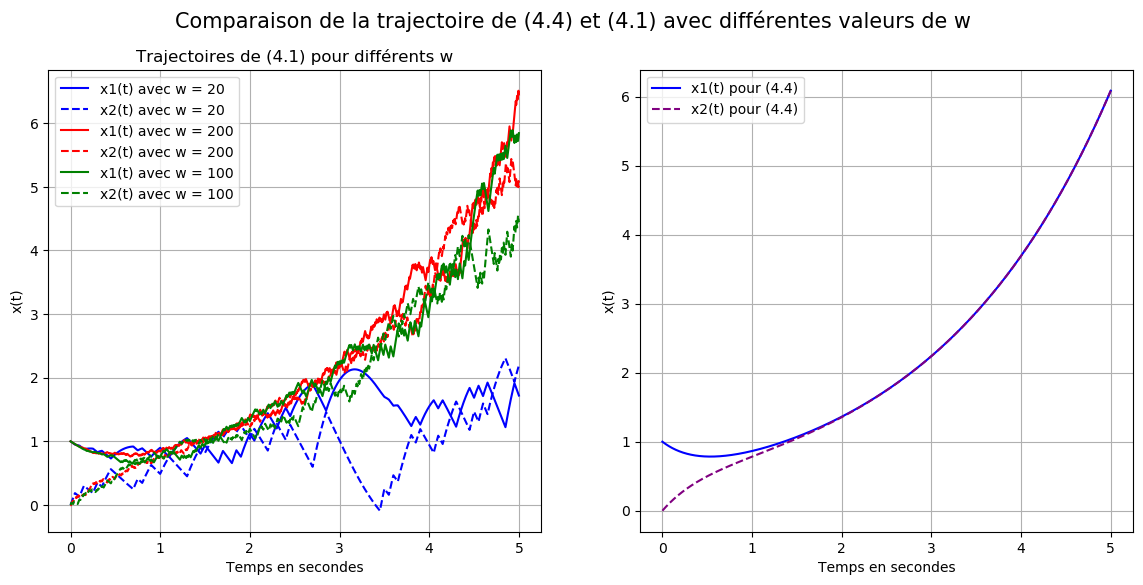

In [15]:
w3 = 20
w4 = 200
x3 = [[x0[0]], [x0[1]]]
x4 = [[x0[0]], [x0[1]]]
probas = [1-p, p]
echantillon3 = npr.choice(espace_etat, p=probas, size=t2*w3)
echantillon4 = npr.choice(espace_etat, p=probas, size=t2*w4)

#Pour la trajectoire (4.4), on utilise de la même manière le tableau x5, avec les mêmes conditions initiales
x5 = [[x0[0]], [x0[1]]]


for i in range(1, N):
    tps = i*h2
    newx1 = x3[0][-1] + h2*(f(x3, tps, w3, echantillon3)[0])
    newx2 = x3[1][-1] + h2*(f(x3, tps, w3, echantillon3)[1])
    x3[0].append(newx1)
    x3[1].append(newx2)
    # de même pour x4
    newx3 = x4[0][-1] + h2*(f(x4, tps, w4, echantillon4)[0])
    newx4 = x4[1][-1] + h2*(f(x4, tps, w4, echantillon4)[1])
    x4[0].append(newx3)
    x4[1].append(newx4)
     # de même pour x5
    newx5 = x5[0][-1] + h2*(f5(x5, tps)[0])
    newx6 = x5[1][-1] + h2*(f5(x5, tps)[1])
    x5[0].append(newx5)
    x5[1].append(newx6)
    

plt.figure(figsize = (14, 6))
plt.suptitle("Comparaison de la trajectoire de (4.4) et (4.1) avec différentes valeurs de w", fontsize=15)

#Traçons le premier graphe, qui représente les trajectoires de l'équation (4.1) en fonction de différents w
plt.subplot(1,2,1)

plt.title('Trajectoires de (4.1) pour différents w')
plt.plot(temps2, x3[0], '-', label='x1(t) avec w = 20', color='blue')
plt.plot(temps2, x3[1], '--', label='x2(t) avec w = 20', color='blue')

plt.plot(temps2, x4[0], '-', label='x1(t) avec w = 200', color='red')
plt.plot(temps2, x4[1], '--', label='x2(t) avec w = 200', color='red')

plt.plot(temps2, x2[0], '-', label='x1(t) avec w = 100', color='green')
plt.plot(temps2, x2[1], '--', label='x2(t) avec w = 100', color='green')

#On pourra décommenter les deux lignes suivantes pour observer la superposition des trajectoires de (4.1) et (4.4)
#plt.plot(temps2, x5[0], '-', label='x1(t) pour (4.4)', color='purple')
#plt.plot(temps2, x5[1], '--', label='x2(t) pour (4.4)', color='purple')

plt.xlabel('Temps en secondes')
plt.ylabel('x(t)')
plt.legend()
plt.grid()

#Traçons le deuxième graphe, qui représente la trajectoire de (4.1)w
plt.subplot(1,2,2)

plt.plot(temps2, x5[0], '-', label='x1(t) pour (4.4)', color='blue')
plt.plot(temps2, x5[1], '--', label='x2(t) pour (4.4)', color='purple')

plt.xlabel('Temps en secondes')
plt.ylabel('x(t)')
plt.legend()
plt.grid()
plt.show()

Nous observons plusieurs phénomènes avec ces graphes. Tout d'abord, nous constatons que, dans le cas de (4.4), l'aléatoire ne rentrant pas en compte, la trajectoire est une courbe sans rupture brutale de pente, au contraire des autres courbes qui alternent entre A0 et A1. Nous constatons aussi qu'au bout d'un certain temps, les conditions initiales différentes pour $x_1(t)$ et $x_2(t)$ n'ont plus d'importance, et que les deux trajectoires sont à peu près au même niveau (exacement pour la trajectoire de (4.4)), l'une passant au-dessus de l'autre par alternance.
Ensuite, nous remarquons que plus $\omega$ est grand, plus la trajectoire a une croissance rapide. Pour $t_2 = 5$, la différence n'est pas toujours visible entre les différentes courbes. Néanmoins, certains échantillons aléatoires donnent lieu à des courbes clairement séparées. C'est notamment visible pour les trajectoires avec $\omega = 20$. On remarque néanmoins que, quand $\omega$ est grand, l'écart entre les valeurs qu'il prend a moins d'importance, et les différentes trajectoires tendent à se superposer. Ainsi la séparation nette des courbes pour  $\omega = 100$ et $\omega = 200$ se produit avec une plus faible probabilité.
Enfin, nous remarquons que la trajectoire (4.4) tend vers ces deux trajectoires ($\omega = 100$ et $\omega = 200$). En particulier, la trajectoire (4.4) ressemble à une courbe lissée de la trajectoire de (4.1) avec $\omega = 200$.

**T9.** Avec les matrices $A_0 $ et $ A_1$ de (4.2) :

\begin{eqnarray*}
\bar{x}(t)&=& e^{A_{\frac{1}{2}}t}x_0 \\ \\ &=& e^{\frac{1}{2}\begin{pmatrix}
- 2 & 3\\
3 & - 2
\end{pmatrix}t}x_0 \\ \\
&=& e^{\frac{1}{4} \begin{pmatrix} 1 & 1\\ -1 & 1 \end{pmatrix} \begin{pmatrix} - 5 & 0\\0 & 1
\end{pmatrix} \begin{pmatrix} 1 & -1\\1 & 1 \end{pmatrix}
t}x_0 \\ \\
&=&
\frac{1}{2} \begin{pmatrix} 1 & 1\\ -1 & 1 \end{pmatrix}
\begin{pmatrix} e^{-\frac{5t}{2}} & 0\\0 & e^{\frac{t}{2}} \end{pmatrix} \begin{pmatrix} 1 & -1\\1 & 1 \end{pmatrix}x_0
\end{eqnarray*}



Comme $ \begin{pmatrix} 1 & -1\\1 & 1 \end{pmatrix} $ est inversible, lorsque $x_0 $ parcourt $\mathbf{R}^{2} $, on aussi $ \begin{pmatrix} 1 & -1\\1 & 1 \end{pmatrix} x_0 $ qui parcourt $\mathbf{R}^{2} $ donc, sans perte de généralité, on note $ x_0=\begin{pmatrix} 1 & -1\\1 & 1 \end{pmatrix}x_0=\begin{pmatrix}x_{01}\\x_{02} \end{pmatrix} $ et on a :


\begin{eqnarray*}
||\bar{x}(t)||^{2} &=& \frac{1}{4}((e^{-\frac{5t}{2}}x_{01}+e^{\frac{t}{2}}x_{02})^{2}+(-e^{-\frac{5t}{2}}x_{01}+e^{\frac{t}{2}}x_{02})^{2})\\
&=&  \frac{1}{4}(e^{-5t}x_{01}^{2}+e^{t}x_{02}^{2})
\end{eqnarray*}

Notons $N=\left\{ x_0 \in \mathbf{R}^{2} | x_{02}= 0 \right\}$ qui est bien négligeable puisque il s'agit d'un hyperplan. On a donc montré que :

\begin{eqnarray*}
\frac{1}{t}ln(||\bar{x}(t)||)\underset{t \to +\infty}{\overset{\lambda p.p.}{\longrightarrow}}=\frac{1}{2}
\end{eqnarray*}

Puisque cela est vrai en dehors de $N$.

**S7.** Nous réutilisons la méthode de la question S5, avec $p = 1/2$.

In [16]:
N7 = 50000
W = [1000, 10000]
Lambda = [] 
tmax = 10
probas = [0.5, 0.5]
for i in range(len(W)):
    w = math.floor(W[i]) + 1
    theta0 = 0
    theta = [theta0]
    # Nous réutilisons la fonction g2 définie dans la question S5.
    h7 = tmax/N7
    echantillon7 = npr.choice(espace_etat, p=probas, size=w*tmax)
    for k in range(1, N7):
        tps = k*h7
        newtheta = theta[-1] + h4*(g2(theta, tps, w, echantillon7))
        newtheta = representant(newtheta)
        theta.append(newtheta)
    valeurs_h = [h(h7*i, theta, h7) for i in range(0, N7)]
    temps = [] 
# Nous définissons un intervalle de temps qui ne commencera pas à 0 car la valeur de 1/t n'y est pas définie.
    valeurs_int = []
    for i in range(1, N7):
        tps = i*h7
        temps3.append(tps)
        I = np.trapz(valeurs_h[0: i+1], dx=h7)
        valeurs_int.append(I/tps)

    Lambda.append(valeurs_int[-1])
print(f"Pour omega = 1000, nous obtenons Lambda = {Lambda[0]}")
print(f"Pour omega = 10000, nous obtenons Lambda = {Lambda[1]}")

Pour omega = 1000, nous obtenons Lambda = 0.46551222572214984
Pour omega = 10000, nous obtenons Lambda = 0.4899365401238797


Cela nous permet de conclure sur la convergence de $\Lambda$ vers 0.5, comme démontré dans la question T9.

**T10**
    (a) Soit $s \leq t$:
\begin{eqnarray*}
x(s) - \bar{x}(s)&=& \int_{0}^{s} x'(u)-\bar{x}'(u) \, du  \\
&=&  \int_{0}^{s} A_{\sigma(u)}x(u)-A_{\frac{1}{2}}\bar{x}(u) \, du  \\
&=& \int_{0}^{s} (A_{\sigma(u)}-A_{\frac{1}{2}})\bar{x}(u)+A_{\sigma(u)}(x(u)-\bar{x}) \, du
\end{eqnarray*}

Ce qui permet d'écrire par inégalité triangulaire que :

\begin{eqnarray*}
||x(s) - \bar{x}(s)|| & \leq & || \int_{0}^{s}(A_{\sigma(u)}-A_{\frac{1}{2}})\bar{x}(u)  \, du ||+||\int_{0}^{s}A_{\sigma(u)}(x(u)-\bar{x}(u))\, du||
\end{eqnarray*}

Traitons séparement les deux expressions. D'une part :

\begin{eqnarray*}
\int_{0}^{s}(A_{\sigma(u)}-A_{\frac{1}{2}})\bar{x}(u)  \, du &=& \sum_{k=0}^{\lfloor \frac{s}{\delta} \rfloor-1} \int_{k\delta}^{(k+1)\delta}(A_{\sigma(u)}-A_{\frac{1}{2}})(\bar{x}(k \delta)+\bar{x}(u)- \bar{x}(k \delta)) \, du \ + \int_{\delta \lfloor \frac{s}{\delta} \rfloor}^{\delta}(A_{\sigma(u)}-A_{\frac{1}{2}})\bar{x}(u) \, du
\end{eqnarray*}

Quitte à diminuer $\delta $, on peut supposer que $\delta \leq \epsilon $ donc :
\begin{eqnarray*}
||\int_{\delta \lfloor \frac{s}{\delta} \rfloor}^{\delta}(A_{\sigma(u)}-A_{\frac{1}{2}})\bar{x}(u) \, du|| &\leq & (s-\lfloor \frac{s}{\delta} \rfloor)2MR \\
&\leq& 2MR \delta \\
&\leq& 2MR \epsilon
\end{eqnarray*}

Par inégalité triangulaire :

\begin{eqnarray*}
||\int_{0}^{s}(A_{\sigma(u)}-A_{\frac{1}{2}})\bar{x}(u)  \, du|| &\leq& \sum_{k=0}^{\lfloor \frac{s}{\delta} \rfloor-1}|| \int_{k\delta}^{(k+1)\delta}(A_{\sigma(u)}-A_{\frac{1}{2}})\bar{x}(k \delta)\, du || + \sum_{k=0}^{\lfloor \frac{s}{\delta} \rfloor-1} \int_{k\delta}^{(k+1)\delta}||(A_{\sigma(u)}-A_{\frac{1}{2}})(\bar{x}(u)- \bar{x}(k \delta))||\, du +2MR \epsilon\\
&\leq& \sum_{k=0}^{\lfloor \frac{s}{\delta} \rfloor-1}|| \int_{k\delta}^{(k+1)\delta}(A_{\sigma(u)}-A_{\frac{1}{2}})\bar{x}(k \delta)\, du || + 2M(\delta \lfloor \frac{s}{\delta} \rfloor + R)\epsilon \\
&\leq& R\sum_{k=0}^{\lfloor \frac{s}{\delta} \rfloor-1}| \int_{k\delta}^{(k+1)\delta} (A_{\sigma(u)}-A_{\frac{1}{2}})\, du | + 2M(t + R)\epsilon  \ \ 
\end{eqnarray*}

*Veuillez noter qu'ici la majoration diffère quelque peu de la vôtre, ce qui ne gène toutefois pas la suite du raisonnement*


D'autre part:

\begin{eqnarray*}
||\int_{0}^{s}A_{\sigma(u)}(x(u)-\bar{x}(u))\, du||& \leq& \int_{0}^{s}||A_{\sigma(u)}(x(u)-\bar{x}(u))||\, du \\
&\leq & M\int_{0}^{s}||x(u)-\bar{x}(u))||\, du
\end{eqnarray*}

En combinant les deux majorations, on obtient que :
\begin{eqnarray*}
||x(s) - \bar{x}(s)|| & \leq & R\sum_{k=0}^{\lfloor \frac{s}{\delta} \rfloor-1}| \int_{k\delta}^{(k+1)\delta} (A_{\sigma(u)}-A_{\frac{1}{2}})\, du | + 2M(t + R)\epsilon +M\int_{0}^{s}||x(u)-\bar{x}(u))||\, du
\end{eqnarray*}


   (b) Soit $ n,m \in \mathbf{N}$:

\begin{eqnarray*}
\mathbf{E} \Bigg( |\sum_{i=m}^{n+m} (A_{\bar{\sigma_i}}-A_{\frac{1}{2}})|\Bigg) &=& \mathbf{E}\Bigg(|\sum_{i=m}^{n+m} ((\frac{1}{2}-\bar{\sigma_i})A_{0}+(\bar{\sigma_i}-\frac{1}{2}A_{1})|\Bigg)\\
&=&\mathbf{E}\Bigg(| A_{0}(\frac{n}{2}-\sum_{i=m}^{n+m} \bar{\sigma_i})+A_{1}(\frac{n}{2}-\sum_{i=m}^{n+m} \bar{\sigma_i})|\Bigg)
\end{eqnarray*}

Ce qui donne par inégalité triangulaire :
\begin{eqnarray*}
\mathbf{E}\Bigg( |\sum_{i=m}^{n+m} (A_{\bar{\sigma_i}}-A_{\frac{1}{2}})|\Bigg) &\leq& 2M\mathbf{E}\Bigg(| \frac{n}{2}-\sum_{i=m}^{n+m} \bar{\sigma_i}|\Bigg)
\end{eqnarray*}

De plus, par par inégalité de jensen appliquée à la fonction carrée, on a, si X est une variable aléatoire:
\begin{eqnarray*}
\mathbf{E}[X]^{2} &\leq& \mathbf{E}[X^{2}]\\
&\Rightarrow &\\
\mathbf{E}[X] &\leq& \sqrt{\mathbf{E}[X^{2}]}
\end{eqnarray*}

Appliquons ce résulat:
\begin{eqnarray*}
\mathbf{E}\Bigg( |\sum_{i=m}^{n+m} (A_{\bar{\sigma_i}}-A_{\frac{1}{2}})|\Bigg) &\leq&
2M\mathbf{E}\Bigg(| \frac{n}{2}-\sum_{i=m}^{n+m} \bar{\sigma_i}|\Bigg)\\ \\
&\leq& 2M\sqrt{\mathbf{E}\Bigg(( \frac{n}{2}-\sum_{i=m}^{n+m} \bar{\sigma_i})^{2}\Bigg)} \\ \\
&\leq& 2M\sqrt{\frac{n}{4}}
\end{eqnarray*}

Puisque il s'agit de la variance d'une loi binomiale de paramêtre $\frac{1}{2} $.


\begin{eqnarray*}
\mathbf{E}\Bigg( |\int_{k\delta}^{(k+1)\delta} (A_{\sigma(u)}-A_{\frac{1}{2}})\, du |\Bigg) &=&
\mathbf{E}\Bigg( | \sum_{i=\lfloor k \delta \omega \rfloor+1}^{\lfloor (k+1) \delta \omega \rfloor-1}\int_{i}^{i+1} \frac{1}{\omega}(A_{\sigma(u)}-A_{\frac{1}{2}})\, du + \int_{\lfloor (k+1) \delta \omega \rfloor}^{(k+1)\delta \omega} \frac{1}{\omega}(A_{\sigma(u)}-A_{\frac{1}{2}})\, du+\int_{k\delta \omega}^{\lfloor k \delta  \rfloor+1} \frac{1}{\omega}(A_{\sigma(u)}-A_{\frac{1}{2}})\, du | \Bigg)
\end{eqnarray*}
Par changement de variable. Par inégalité triangulaire et en appliquant le résultat précédent:

\begin{eqnarray*}
\mathbf{E}\Bigg( |\int_{k\delta}^{(k+1)\delta} (A_{\sigma(u)}-A_{\frac{1}{2}})\, du |\Bigg) &=&
\mathbf{E}\Bigg( | \sum_{i=\lfloor k \delta \omega \rfloor+1}^{\lfloor (k+1) \delta \omega \rfloor-1}\int_{i}^{i+1} \frac{1}{\omega}(A_{\sigma(u)}-A_{\frac{1}{2}})\, du |\Bigg) +\mathbf{E}\Bigg( | \int_{\lfloor (k+1) \delta \omega \rfloor}^{(k+1)\delta \omega} \frac{1}{\omega}(A_{\sigma(u)}-A_{\frac{1}{2}})\, du |\Bigg) + \mathbf{E}\Bigg( |\int_{k\delta \omega}^{\lfloor k \delta  \rfloor+1} \frac{1}{\omega}(A_{\sigma(u)}-A_{\frac{1}{2}})\, du | \Bigg) \\
&\leq& \frac{1}{\omega} C\sqrt{\lfloor (k+1) \delta \omega \rfloor -\lfloor k \delta \omega \rfloor-2 + 2M ((k+1)\delta \omega-\lfloor (k+1) \delta \omega \rfloor+ \lfloor k \delta  \rfloor +1 - k\delta \omega)}\\
&\leq& \frac{C'}{\sqrt{\omega}}\\ \\
\end{eqnarray*}

Ou $C'$ est une constante qui dépend de $ \delta$.

   (c) On applique le lemme de Grönwall dans l'expression suivante :
\begin{eqnarray*}
||x(s) - \bar{x}(s)|| & \leq & R\sum_{k=0}^{\lfloor \frac{t}{\delta} \rfloor-1}| \int_{k\delta}^{(k+1)\delta} (A_{\sigma(u)}-A_{\frac{1}{2}})\, du | + 2M(t + R)\epsilon +M\int_{0}^{s}||x(u)-\bar{x}(u))||\, du
\end{eqnarray*}

Ce qui donne que :

\begin{eqnarray*}
||x(s) - \bar{x}(s)|| & \leq & (R\sum_{k=0}^{\lfloor \frac{t}{\delta} \rfloor-1}| \int_{k\delta}^{(k+1)\delta} (A_{\sigma(u)}-A_{\frac{1}{2}})\, du | + 2M(t + R)\epsilon)(1+ M s e^{M s})
\end{eqnarray*}

En passant à la borne supérieure:

\begin{eqnarray*}
\underset{s \in [0,t]}{sup}||x(s) - \bar{x}(s)|| & \leq & \Bigg(R\sum_{k=0}^{\lfloor \frac{t}{\delta} \rfloor-1}| \int_{k\delta}^{(k+1)\delta} (A_{\sigma(u)}-A_{\frac{1}{2}})\, du | + 2M(t + R)\epsilon \Bigg)(1+ M t e^{M t})
\end{eqnarray*}

Enfin on passe à l'espérance:

\begin{eqnarray*}
\mathbf{E}\Bigg( \underset{s \in [0,t]}{sup} ||x(s) - \bar{x}(s)|| \Bigg) & \leq &\Bigg( R \ \mathbf{E} \Bigg( \sum_{k=0}^{\lfloor \frac{t}{\delta} \rfloor-1}| \int_{k\delta}^{(k+1)\delta} (A_{\sigma(u)}-A_{\frac{1}{2}})\, du | \Bigg) + 2M(t + R)\epsilon\Bigg)(1+ M t e^{M t}) \\
\end{eqnarray*}

Avec la majoration de la question précédente:

\begin{eqnarray*}
\mathbf{E} ( \underset{s \in [0,t]}{sup} ||x(s) - \bar{x}(s)|| ) & \leq & (R \lfloor    \frac{t}{\delta} \frac{C'}{\sqrt{\omega}} \rfloor + 2M(t + R)\epsilon)(1+ M t e^{M t})
\end{eqnarray*}

Ce qui permet de conclure, $ \epsilon $ étant arbitrairement petit, que:

\begin{eqnarray*}
\mathbf{E} ( \underset{s \in [0,t]}{sup} ||x(s) - \bar{x}(s)|| )\underset{w \rightarrow + \infty} {\rightarrow} 0
\end{eqnarray*}